In [76]:
pip install matplotlib

In [196]:
pip install folium

  Using cached folium-0.12.1-py2.py3-none-any.whl (94 kB)
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached branca-0.4.2-py3-none-any.whl (24 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
Note: you may need to restart the kernel to use updated packages.


In [200]:
pip install geoid

  Created wheel for geoid: filename=geoid-1.1.5-py3-none-any.whl size=40801 sha256=62f3b8bb268597d30e792af54cae0febc55bfbc9adb4ce133943a918023d1430
  Stored in directory: c:\users\louisa\appdata\local\pip\cache\wheels\c6\75\22\dd87c60efdec360ce790ff6262400fed9b330a56b5312d4099
Successfully built geoid
Note: you may need to restart the kernel to use updated packages.


In [202]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium as flm
import geoid

In [102]:
df=pd.read_json('Glascontainer.json')
del df['icon']
del df['id']
del df['publish_up']
del df['title']
del df['category']
df['zip'].replace('', np.nan, inplace=True)
df.dropna(subset=['zip'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop([1088,1235,675,796], inplace=True)
df

,zip,city,street,lat,lng,address
0,10555,Berlin,Bachstr. / Siegmunds Hof Parkplatz,52.515015,13.336255,10555 Berlin Bachstr. / Siegmunds Hof Parkplatz
1,10585,Berlin,Richard-Wagner-Str. 58,52.516969,13.306909,10585 Berlin Richard-Wagner-Str. 58
2,10585,Berlin,Zillestr. / Gierkezeile ggü. 91-95,52.513323,13.303422,10585 Berlin Zillestr. / Gierkezeile ggü. 91-95
3,10587,Berlin,Abbestr. / Nähe Guerickestr.,52.516956,13.320911,10587 Berlin Abbestr. / Nähe Guerickestr.
4,10587,Berlin,Guerickestr. / Galvanistr.,52.517782,13.315616,10587 Berlin Guerickestr. / Galvanistr.
...,...,...,...,...,...,...
1551,12627,Nossener Straße – Glauchauer Straße,,52.529867,13.607332,12627 Berlin Nossener Straße – Glauchauer Straße
1552,12619,Peter-Huchel-Straße ggü. 22-24,,52.525158,13.590108,12619 Berlin Peter-Huchel-Straße ggü. 22-24
1553,12619,Tollensestraße - Cecilienstraße,,52.524197,13.583568,12619 Berlin Tollensestraße - Cecilienstraße
1554,12629,Zossener Straße 19,,52.548217,13.587347,12629 Berlin Zossener Straße 19


In [133]:
berlin='Berlin_Bezirke.shp'
berlin_map=gpd.read_file(berlin)
berlin_map

,FID,gml_id,Gemeinde_n,Gemeinde_s,Land_name,Land_schlu,Schluessel,SHAPE_Leng,SHAPE_Area,geometry
0,1,s_wfs_alkis_bezirk.F176__1,Reinickendorf,012,Berlin,11,11000012,85589.289316,2.416586e+08,"POLYGON ((1482858.476 6914225.329, 1482891.234..."
1,2,s_wfs_alkis_bezirk.F176__2,Charlottenburg-Wilmersdorf,004,Berlin,11,11000004,71785.131858,1.742738e+08,"POLYGON ((1482899.142 6895516.327, 1482928.310..."
2,3,s_wfs_alkis_bezirk.F176__3,Treptow-Köpenick,009,Berlin,11,11000009,149810.619914,4.503972e+08,"POLYGON ((1511635.635 6871103.429, 1511600.785..."
3,4,s_wfs_alkis_bezirk.F176__4,Pankow,003,Berlin,11,11000003,109210.896203,2.792661e+08,"MULTIPOLYGON (((1503348.346 6912941.540, 15033..."
4,5,s_wfs_alkis_bezirk.F176__5,Neukölln,008,Berlin,11,11000008,66590.293473,1.207122e+08,"POLYGON ((1498173.369 6888425.071, 1498200.103..."
5,6,s_wfs_alkis_bezirk.F176__6,Lichtenberg,011,Berlin,11,11000011,75961.265817,1.406199e+08,"POLYGON ((1505391.535 6886332.918, 1505361.683..."
6,7,s_wfs_alkis_bezirk.F176__7,Marzahn-Hellersdorf,010,Berlin,11,11000010,67457.607608,1.666802e+08,"POLYGON ((1515411.400 6885947.513, 1515389.792..."
7,8,s_wfs_alkis_bezirk.F176__8,Spandau,005,Berlin,11,11000005,100052.537728,2.477770e+08,"POLYGON ((1472889.486 6902247.121, 1472906.819..."
8,9,s_wfs_alkis_bezirk.F176__9,Steglitz-Zehlendorf,006,Berlin,11,11000006,103050.006867,2.754574e+08,"POLYGON ((1482722.688 6885007.485, 1482757.598..."
9,10,s_wfs_alkis_bezirk.F176__10,Mitte,001,Berlin,11,11000001,58707.772351,1.062882e+08,"POLYGON ((1489144.389 6902186.863, 1489151.101..."


In [120]:
Bezirke_PLZ={'Reinickendorf':['13465','13503','13467','13505','13469','13435', '13439','13403', '13405', '13407', '13409', '13437','13509','13507'],
             'Charlottenburg-Wilmersdorf': ['10707', '10709', '10711', '10713', '10715', '10717', '10719','10789','14055','14197', '14199','14193', '10585', '10587', '10589', '10623', '10625', '10627', '10629','13627','14050', '14052', '14053','14057', '14059'],
             'Treptow-Köpenick': ['12524','12526','12587','12487','12489','12555','12557','12559','12439','12459','12437','12527','12435', '12589'],
             'Pankow': ['13129','13159','13125','13127', '13158','13089','10439', '13187', '13189','10405', '10407','10409', '10435', '10437','13156','13086', '13088'],
             'Neukölln': ['12347', '12349','12043', '12045', '12047', '12049', '12051', '12053', '12055', '12057', '12059','12351', '12353', '12355', '12357', '12359'],
             'Lichtenberg': ['10315', '10319','13053','13055','13057','10318','10365','10367','10369','13051','10317','13059'],
             'Marzahn-Hellersdorf': ['12627', '12629','12619','12621','12623','12679', '12681', '12685', '12687', '12689', '12683'],
             'Spandau': ['14089','13629','13583','13585','13587','13589','13597','13599','13581','13591','13593','13595'], 
             'Steglitz-Zehlendorf': ['14129', '14163', '14165', '14169','14195', '12247', '12249', '12203', '12205', '12207', '12209','14167','14109','12163', '12165', '12167', '12169'], 
             'Mitte': ['10555', '10551', '10553', '10557', '10559','10115', '10117', '10119', '10178', '10179', '10785', '10787','13347', '13349', '13351', '13353', '13355', '13357', '13359'],
             'Friedrichshain-Kreuzberg': ['10243', '10247', '10249','10961', '10963', '10965', '10967', '10969', '10997', '10999' ],
             'Tempelhof-Schöneberg':['10827', '12157', '12159', '12161','12099', '12103', '12105', '12107', '12109', '12277','12279', '12307', '12305','12309','10777', '10779', '10781', '10783','10823', '10825', '10829','12101'],
             }

In [121]:
Bezirke=[]
for i in df['zip']:
    for key in Bezirke_PLZ:
        if any(x in i for x in Bezirke_PLZ[key]):
            Bezirke.append(key)
            
print(len(Bezirke))

1540


In [125]:
bezirke_list_count=[]
print(bezirke_list_count)

[]


In [126]:
for key in Bezirke_PLZ:
    bezirke_list_count.append(Bezirke.count(key))
    #Bezirke_Count[key]=Bezirke.count(key)
    
    
print(bezirke_list_count)

[55, 122, 170, 159, 116, 177, 184, 90, 123, 122, 108, 114]


In [209]:
Bezirke_df=pd.DataFrame()
Bezirke_df['Bezirke']=Bezirke_PLZ.keys()
Bezirke_df['count']=bezirke_list_count
Bezirke_df['lat']=[ '52.566667', '52.500000', '52.450000', '52.582501', '52.469628', '52.533590', '52.522935', '52.533433', '52.445421', '52.530644' , '52.499567', '52.472160'] 
Bezirke_df['lng']=[ '13.333333', '13.283333', '13.566667' , '13.431302', '13.439352', '13.499857', '13.576597', '13.200423',  '13.291828', '13.383068', '13.431419', '13.370287']
Bezirke_df

,Bezirke,count,lat,lng
0,Reinickendorf,55,52.566667,13.333333
1,Charlottenburg-Wilmersdorf,122,52.500000,13.283333
2,Treptow-Köpenick,170,52.450000,13.566667
3,Pankow,159,52.582501,13.431302
4,Neukölln,116,52.469628,13.439352
5,Lichtenberg,177,52.533590,13.499857
6,Marzahn-Hellersdorf,184,52.522935,13.576597
7,Spandau,90,52.533433,13.200423
8,Steglitz-Zehlendorf,123,52.445421,13.291828
9,Mitte,122,52.530644,13.383068


<AxesSubplot:>

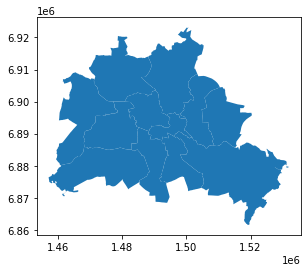

In [210]:
berlin_map.plot()


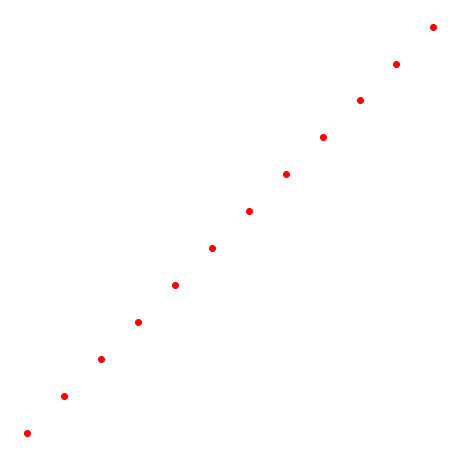

In [173]:
def visualise_osm_scatter():
    df = merged
    world = gpd.read_file('Berlin_Bezirke.shp')
    fig, ax = plt.subplots(figsize=[8, 9.5])
    ax.axis('off')
    world.plot(color='w', edgecolor='black', linewidth=0.5, ax=ax)
    ax.scatter(df['lng'], df['lat'], c='red')

    return fig, ax
fig, ax=visualise_osm_scatter()

In [191]:
def visualise_osm(plot='heatmap'):

    df = merged

    # plot query results on map of Germany
    world = gpd.read_file('Berlin_Bezirke.shp')
    fig, ax = plt.subplots(figsize=[8, 9.5])
    ax.axis('off')
    if plot=='scatter':
        world.plot(color='w', edgecolor='black', linewidth=0.5, ax=ax)
        ax.scatter(df['lng'], df['lat'], c='red')
    elif plot=='heatmap':
        # see https://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434
        smoothing = 30  # smoothing factor
        bins=1000  # "pixel count"
        cmap='hot'  # color scale
        xlim = [5.7, 15.2]  # East-West extent of Germany
        ylim = [47.1, 55.1]  # North-South extent of Germany
        heatmap, xedges, yedges = np.histogram2d(df['lat'], df['lng'],bins=bins, range=[ylim, xlim])

        world['geometry'].boundary.plot(color='k', edgecolor='black', linewidth=0.2, ax=ax)
        ax.imshow(logheatmap, cmap=cmap, extent=extent)
        ax.invert_yaxis()
        ax.set(xlim=xlim, ylim=ylim)

    return fig, ax


TypeError: '<' not supported between instances of 'float' and 'str'

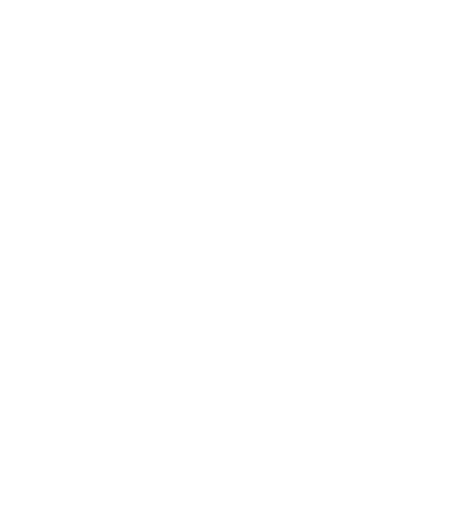

In [194]:
visualise_osm(plot='heatmap')

In [211]:
merged=berlin_map.set_index('Gemeinde_n').join(Bezirke_df.set_index('Bezirke'))
merged=merged.reset_index()
merged

,Gemeinde_n,FID,gml_id,Gemeinde_s,Land_name,Land_schlu,Schluessel,SHAPE_Leng,SHAPE_Area,geometry,count,lat,lng
0,Reinickendorf,1,s_wfs_alkis_bezirk.F176__1,012,Berlin,11,11000012,85589.289316,2.416586e+08,"POLYGON ((1482858.476 6914225.329, 1482891.234...",55,52.566667,13.333333
1,Charlottenburg-Wilmersdorf,2,s_wfs_alkis_bezirk.F176__2,004,Berlin,11,11000004,71785.131858,1.742738e+08,"POLYGON ((1482899.142 6895516.327, 1482928.310...",122,52.500000,13.283333
2,Treptow-Köpenick,3,s_wfs_alkis_bezirk.F176__3,009,Berlin,11,11000009,149810.619914,4.503972e+08,"POLYGON ((1511635.635 6871103.429, 1511600.785...",170,52.450000,13.566667
3,Pankow,4,s_wfs_alkis_bezirk.F176__4,003,Berlin,11,11000003,109210.896203,2.792661e+08,"MULTIPOLYGON (((1503348.346 6912941.540, 15033...",159,52.582501,13.431302
4,Neukölln,5,s_wfs_alkis_bezirk.F176__5,008,Berlin,11,11000008,66590.293473,1.207122e+08,"POLYGON ((1498173.369 6888425.071, 1498200.103...",116,52.469628,13.439352
5,Lichtenberg,6,s_wfs_alkis_bezirk.F176__6,011,Berlin,11,11000011,75961.265817,1.406199e+08,"POLYGON ((1505391.535 6886332.918, 1505361.683...",177,52.533590,13.499857
6,Marzahn-Hellersdorf,7,s_wfs_alkis_bezirk.F176__7,010,Berlin,11,11000010,67457.607608,1.666802e+08,"POLYGON ((1515411.400 6885947.513, 1515389.792...",184,52.522935,13.576597
7,Spandau,8,s_wfs_alkis_bezirk.F176__8,005,Berlin,11,11000005,100052.537728,2.477770e+08,"POLYGON ((1472889.486 6902247.121, 1472906.819...",90,52.533433,13.200423
8,Steglitz-Zehlendorf,9,s_wfs_alkis_bezirk.F176__9,006,Berlin,11,11000006,103050.006867,2.754574e+08,"POLYGON ((1482722.688 6885007.485, 1482757.598...",123,52.445421,13.291828
9,Mitte,10,s_wfs_alkis_bezirk.F176__10,001,Berlin,11,11000001,58707.772351,1.062882e+08,"POLYGON ((1489144.389 6902186.863, 1489151.101...",122,52.530644,13.383068


<AxesSubplot:title={'center':'Heatmap'}>

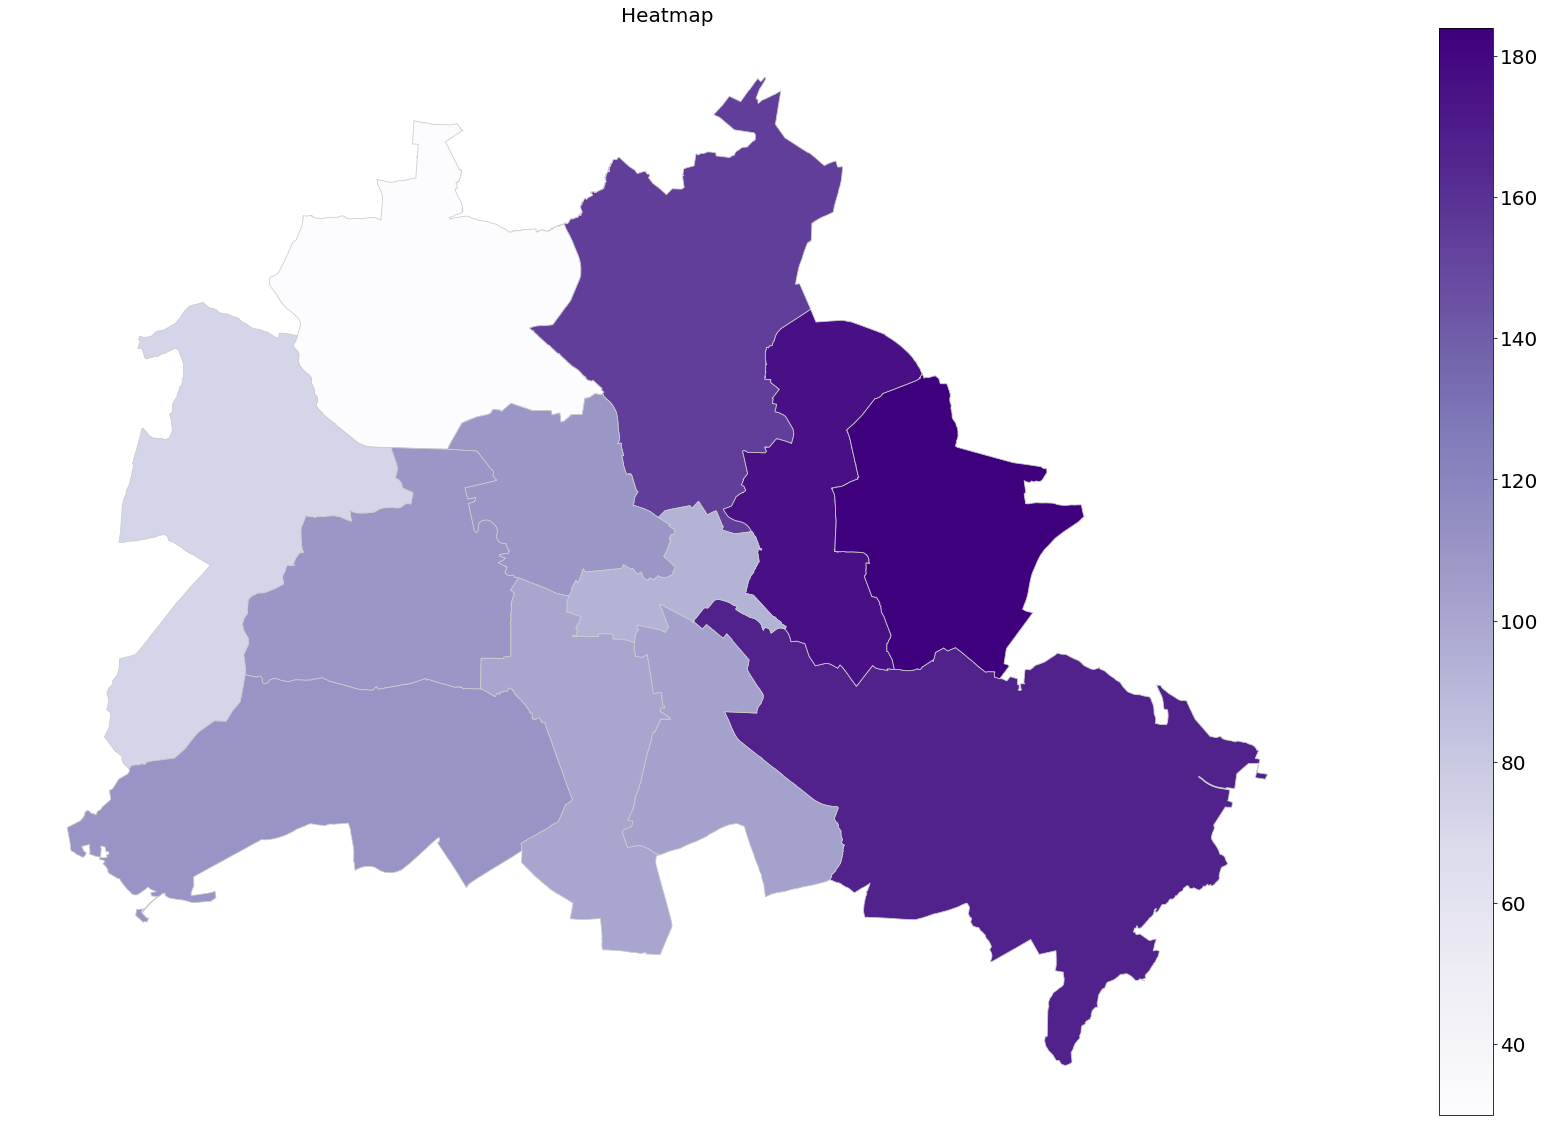

In [213]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heatmap', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Purples'
vmin, vmax = 30, 184
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('count', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

In [214]:

berlin_districts = gpd.read_file('Berlin_Bezirke.shp')  
berlin_districts.crs = {'datum': 'NAD83', 'ellps': 'GRS80', 'proj':'longlat', 'no_defs':True}

#district = berlin_districts[ berlin_districts.GEOID == '3623' ]  # 36 = NY, 23 = District

# convert it to the projection of our folium openstreetmap  
#district= district23.to_crs({'init':'epsg:3857'})

In [230]:
from folium.plugins import HeatMap

for_map = merged

#max_amount = float(for_map['count'].max())

hmap = flm.Map(location=[13.2, 52], zoom_start=7, )

hm_wide = HeatMap( list(zip(for_map['lat'], for_map['lng'], for_map['count'])),
                   min_opacity=40,max_opacity=180,
                   radius=30, blur=35, 
                   max_zoom=1, 
                 )

flm.GeoJson(merged).add_to(hmap)
hmap.add_child(hm_wide)